In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
y = data['Admitted']
x1 = data['SAT'] 

Text(0,0.5,'Admitted')

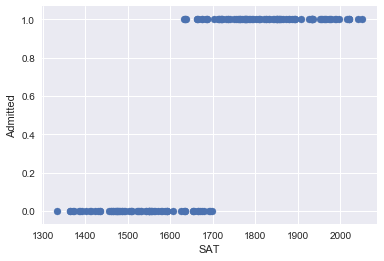

In [5]:
plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

In [7]:
results_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

Text(0,0.5,'Admitted')

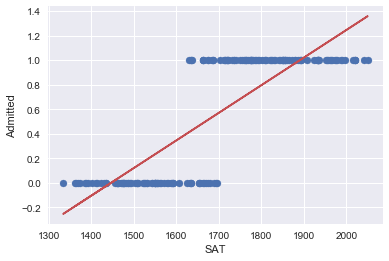

In [9]:
plt.scatter(x1, y)
y_hat = x1 * results_lin.params[1] + results_lin.params[0]
plt.plot(x1, y_hat, color='C8')
plt.xlabel('SAT')
plt.ylabel('Admitted')

In [10]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [11]:
def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1)/(1 + np.exp(b0 + b1 * x)))

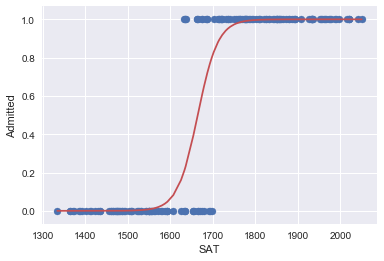

In [13]:
f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')

plt.plot(x_sorted, f_sorted, color='C8')

In [14]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 May 2019   Pseudo R-squ.:                  0.7992
Time:                        11:04:22   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [15]:
x0 = np.ones(168)
reg_log1 = sm.Logit(y, x0)
results_log1 = reg_log1.fit()
results_log1.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Sat, 11 May 2019   Pseudo R-squ.:               7.410e-11
Time:                        11:14:43   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [17]:
np.exp(0.042)*100

104.28944787507632